In [1]:
import librosa

In [4]:
#サンプル音楽ファイルをロードする
file_name = librosa.example('nutcracker')

In [6]:
file_name

'C:\\Users\\200271\\AppData\\Local\\librosa\\librosa\\Cache\\Kevin_MacLeod_-_P_I_Tchaikovsky_Dance_of_the_Sugar_Plum_Fairy.ogg'

In [5]:
y, sr = librosa.load(file_name)

In [9]:
#テンポを解析する
tempo, beat_frames = librosa.beat.beat_track(y = y, sr = sr)

In [11]:
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))

Estimated tempo: 107.67 beats per minute


In [14]:
beat_times = librosa.frames_to_time(beat_frames, sr = sr)
print(beat_times)

[  1.18421769   1.71827664   2.32199546   2.87927438   3.45977324
   4.01705215   4.59755102   5.13160998   5.7353288    6.29260771
   6.84988662   7.40716553   7.9876644    8.54494331   9.12544218
   9.65950113  10.21678005  10.72761905  11.28489796  11.79573696
  12.32979592  12.86385488  13.42113379  13.95519274  14.4892517
  15.02331066  15.55736961  16.09142857  16.62548753  17.15954649
  17.69360544  18.25088435  18.80816327  19.31900227  19.87628118
  20.38712018  20.92117914  21.4552381   21.98929705  22.52335601
  23.05741497  23.59147392  24.12553288  24.65959184  25.19365079
  25.72770975  26.26176871  26.81904762  27.35310658  27.88716553
  28.44444444  29.00172336  29.55900227  30.11628118  30.67356009
  31.20761905  31.78811791  32.34539683  32.85623583  33.36707483
  33.90113379  34.43519274  34.94603175  35.45687075  35.99092971
  36.52498866  37.03582766  37.56988662  38.12716553  38.66122449
  39.2185034   39.75256236  40.30984127  40.84390023  41.40117914
  41.935238

In [1]:
import numpy as np
import librosa
import librosa.display

In [2]:
y, sr = librosa.load(librosa.ex('nutcracker'))

In [3]:
hop_length = 512

In [4]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [5]:
tempo, beat_frames = librosa.beat.beat_track(y = y_percussive, sr = sr)

In [6]:
mfcc = librosa.feature.mfcc(y = y, sr = sr, hop_length = hop_length, n_mfcc = 13)

In [7]:
mfcc_delta = librosa.feature.delta(mfcc)

In [8]:
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), beat_frames)

In [9]:
chromagram = librosa.feature.chroma_cqt(y = y_harmonic, sr = sr)

In [10]:
beat_chroma = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

In [11]:
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

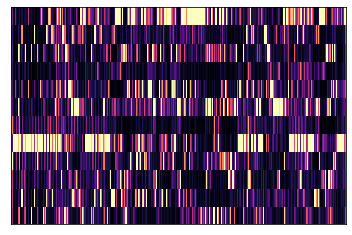

In [12]:
librosa.display.specshow(chromagram)